In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()

SX1 = "../data/SX1_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_99mV.npy"

data = {}
data["SX1"] = np.array(list( zip(*np.load(SX1)) ))


sample_spacing 1e-06
pulse_spacing 0.002 (2ms)

samples_per_chirp: 2000
samples: 1006484
chirp_no: 503.242
samples_trunc: 1006000
chirp_no_trunc: 503

mean: 1594
Lengths match?: True
Done


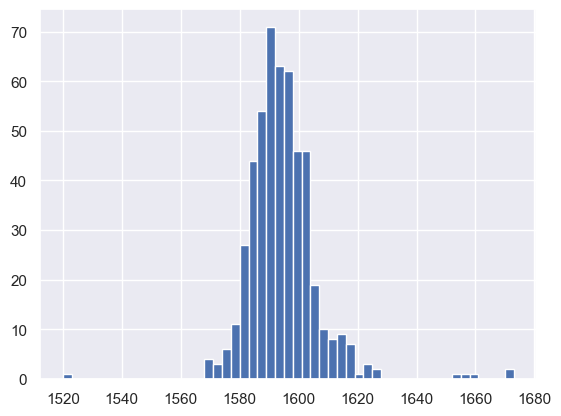

In [2]:
# Create truth data for SX1

# Find position of chirp per cycle

t = data["SX1"][0]
sig = data["SX1"][1]

sample_spacing = 1e-6
pulse_spacing = 2e-3  # 2ms
print("sample_spacing", sample_spacing)
print("pulse_spacing", pulse_spacing, "(2ms)")
print()

samples_per_chirp = int(pulse_spacing / sample_spacing)
samples = len(t)
chirp_no = samples / samples_per_chirp

print("samples_per_chirp:", samples_per_chirp)
print("samples:", samples)
print("chirp_no:", chirp_no)

samples_trunc = samples - (samples % samples_per_chirp)
chirp_no_trunc = samples_trunc // samples_per_chirp
print("samples_trunc:", samples_trunc)
print("chirp_no_trunc:", chirp_no_trunc)

t_trunc = t[:samples_trunc]
sig_trunc = sig[:samples_trunc]

chirp_sections = []
for i in range(chirp_no_trunc-1):
    section_start = samples_per_chirp * i
    section_end = samples_per_chirp * (i + 1)
    t_section = t[section_start:section_end]
    sig_section = sig[section_start:section_end]
    chirp_section = (t_section, sig_section)
    chirp_sections.append(chirp_section)

tops = []
for t_section, sig_section in chirp_sections:
    max_idx = np.argmax(sig_section)
    tops.append(max_idx)

print()
mean = int(np.mean((tops)))
print("mean:", mean)

fig, axis = plt.subplots()
axis.hist(tops, bins="auto")

# Create truth data
SX1_truth_data = np.zeros(1006484)
for i in range(chirp_no_trunc):
    idx_of_chirp = samples_per_chirp * i + mean
    SX1_truth_data[idx_of_chirp] = True

print("Lengths match?:", len(t) == len(SX1_truth_data) )


# Write to file
to_write = pd.DataFrame()
to_write["t"] = t
to_write["truth_data"] = SX1_truth_data
to_write.to_csv("../data/SX1_truth_data.csv")
print("Done")
